<a href="https://colab.research.google.com/github/NancyBudgujjar/AI-ML-IGDTUW-Heart-Disease-/blob/main/Heart_disease_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project/heart_disease_health_indicators_BRFSS2015.csv')
df.shape

(253680, 22)

In [4]:
df['HeartDiseaseorAttack'].value_counts() # 1 = Heart disease and 2 is no disease

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [5]:
categories = {0.0: 0, 1.0: 1}   #Now we map 0.0 = 0(Heart disease), 1.0 = 1(no disease)
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].replace(categories)

#Define the dependent variable that needs to be predicted (labels)
#Y = df["Label"].values

In [6]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
df.describe().T  #Values need to be normalized before fitting.

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [9]:
print(df.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [10]:
df.nunique() # used to get count of unique values in dataset

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [11]:
df.duplicated().sum()

23899

Since there is no unique patient identifier against each observation, and since it is highly improbable that two subjects have the same exact feature values, its safe to say that these records are possibly duplicates. I will remove these.

In [12]:
df[df.duplicated]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,0.0,1.0,1.0,1.0,27.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,0.0,1.0,1.0,1.0,33.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [13]:
df = df.drop_duplicates().reset_index().drop('index', axis = 1)

In [14]:
df.shape

(229781, 22)

In [15]:
df = df.rename(columns={'HeartDiseaseorAttack':'Label'}) #Rename Dataset to Label to make it easy to understand
print(df.dtypes)

Label                float64
HighBP               float64
HighChol             float64
CholCheck            float64
BMI                  float64
Smoker               float64
Stroke               float64
Diabetes             float64
PhysActivity         float64
Fruits               float64
Veggies              float64
HvyAlcoholConsump    float64
AnyHealthcare        float64
NoDocbcCost          float64
GenHlth              float64
MentHlth             float64
PhysHlth             float64
DiffWalk             float64
Sex                  float64
Age                  float64
Education            float64
Income               float64
dtype: object


<Axes: xlabel='Label', ylabel='count'>

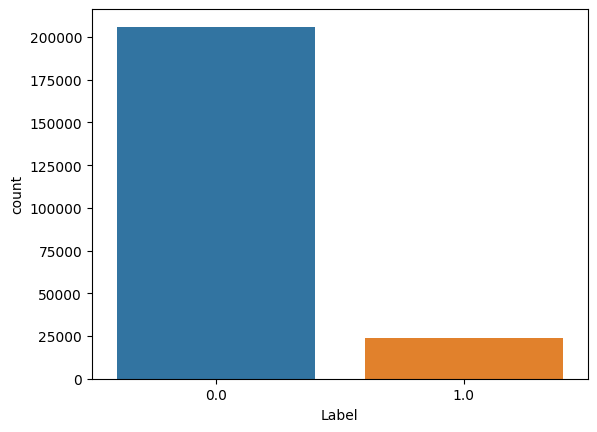

In [16]:
sns.countplot(x="Label", data=df)

<Axes: xlabel='Label', ylabel='count'>

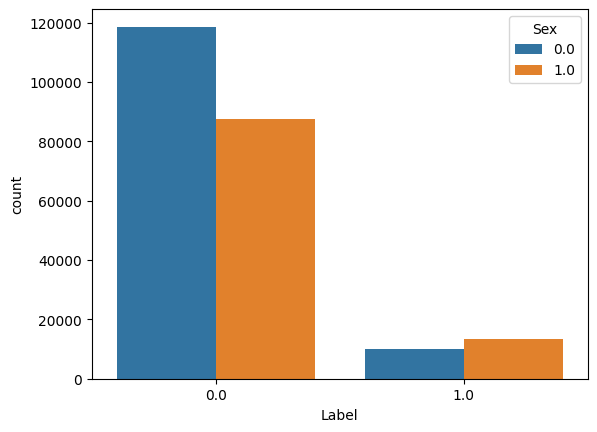

In [17]:
sns.countplot(x="Label", hue="Sex", data=df)

<Axes: xlabel='Age', ylabel='count'>

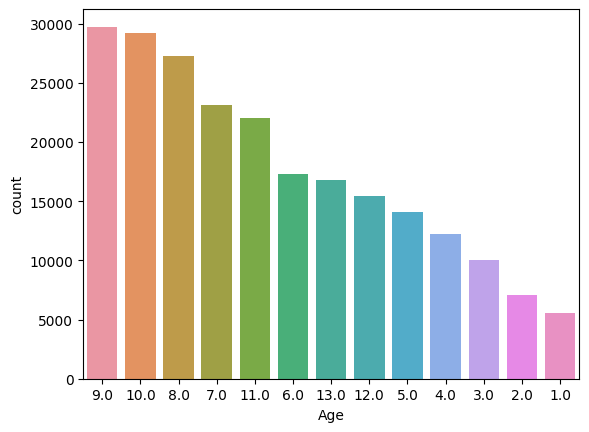

In [18]:
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)

<Axes: xlabel='Label', ylabel='BMI'>

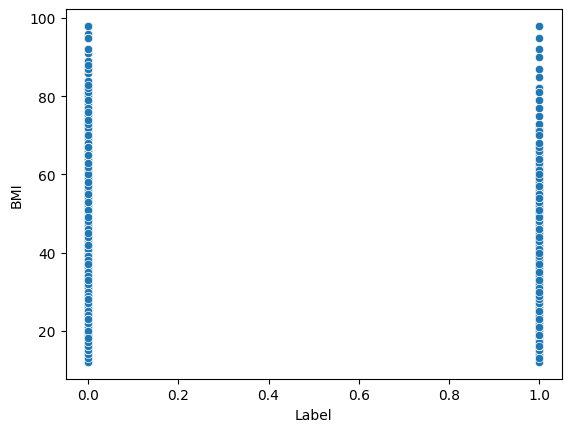

In [19]:
sns.scatterplot(x="Label", y="BMI", data=df)

<Axes: xlabel='Label', ylabel='MentHlth'>

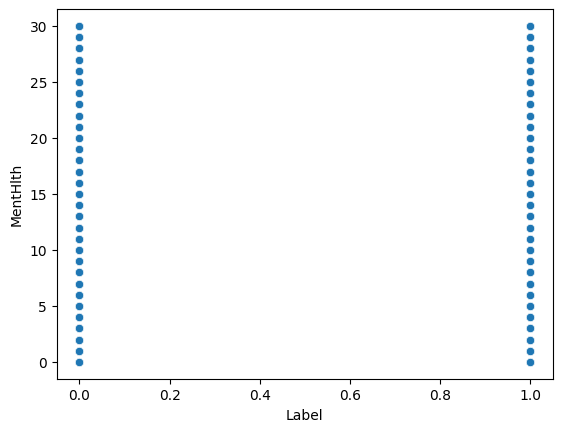

In [20]:
sns.scatterplot(x="Label", y="MentHlth", data=df)

<Axes: xlabel='Label', ylabel='PhysHlth'>

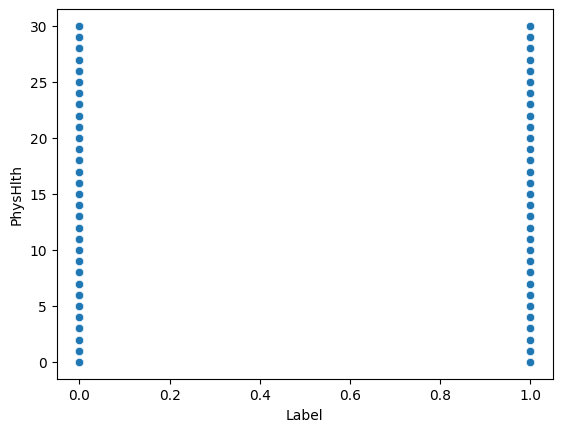

In [21]:
sns.scatterplot(x="Label", y="PhysHlth", data=df)

<Axes: >

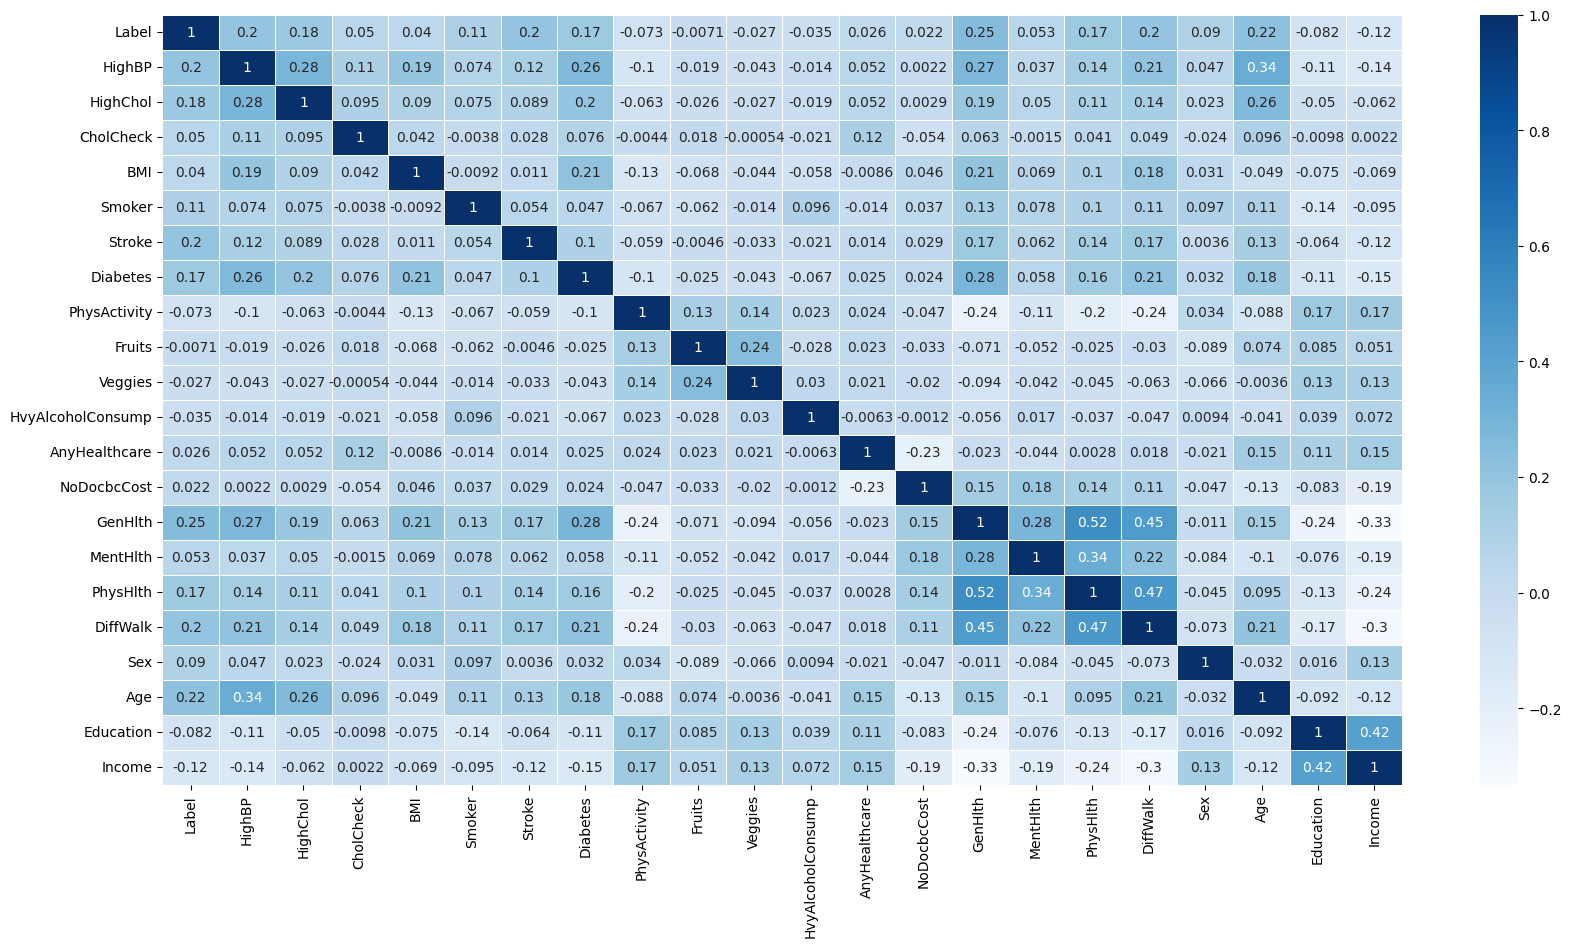

In [22]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap="Blues",linewidths=.5, annot=True)

In [23]:
df['Sex'].value_counts()

0.0    128854
1.0    100927
Name: Sex, dtype: int64

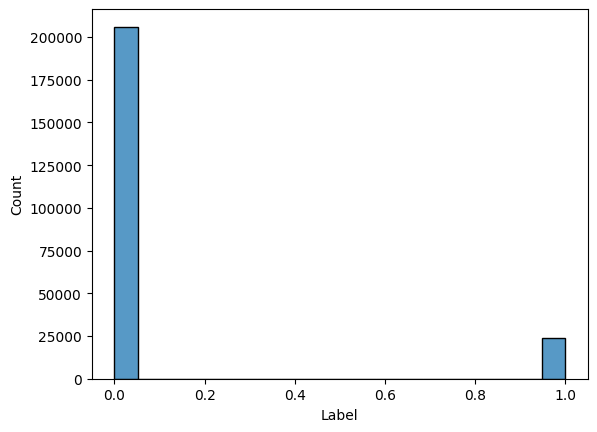

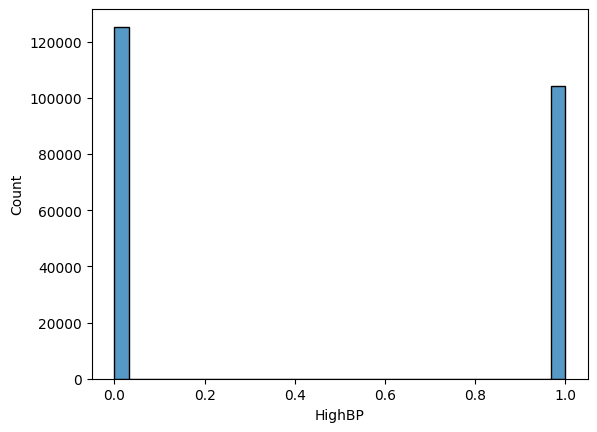

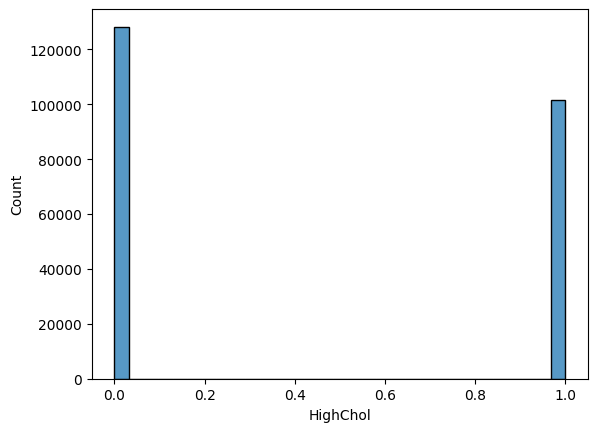

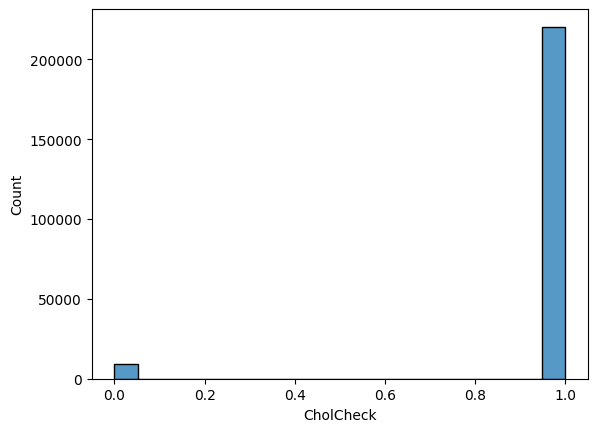

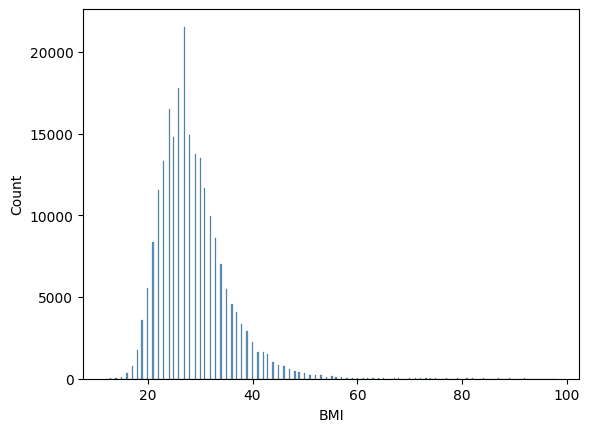

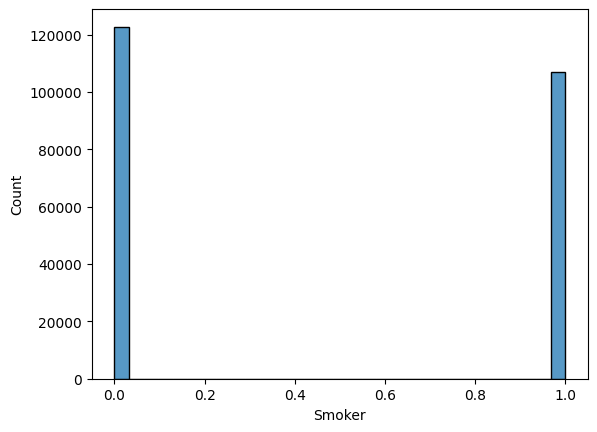

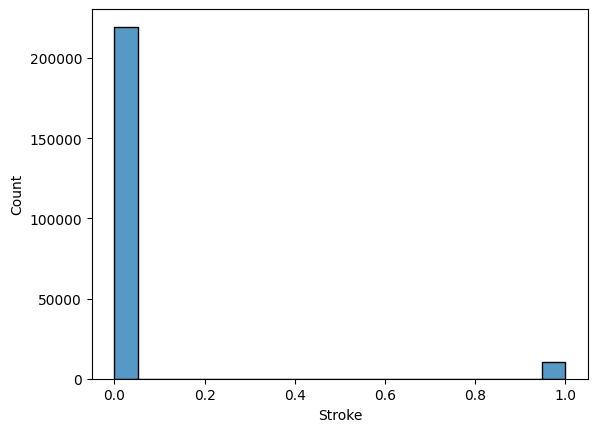

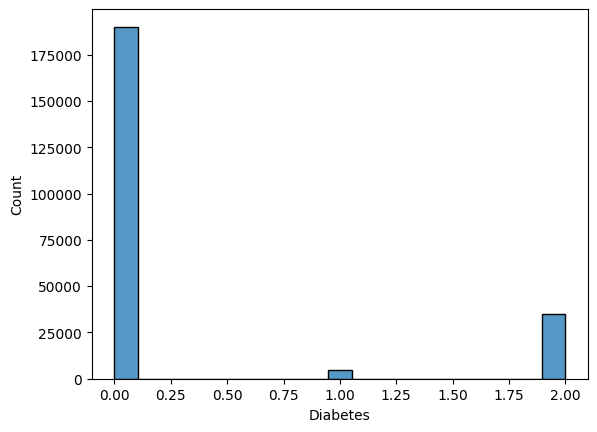

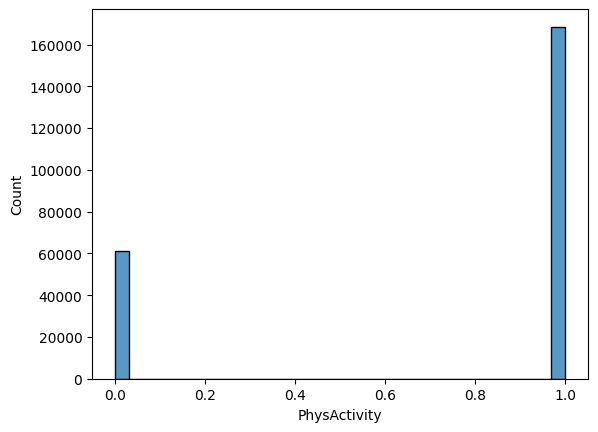

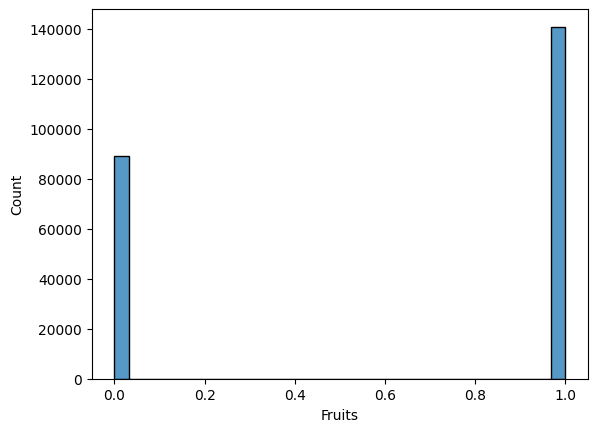

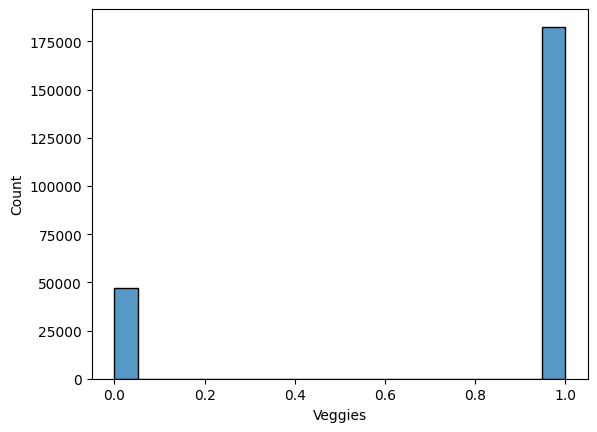

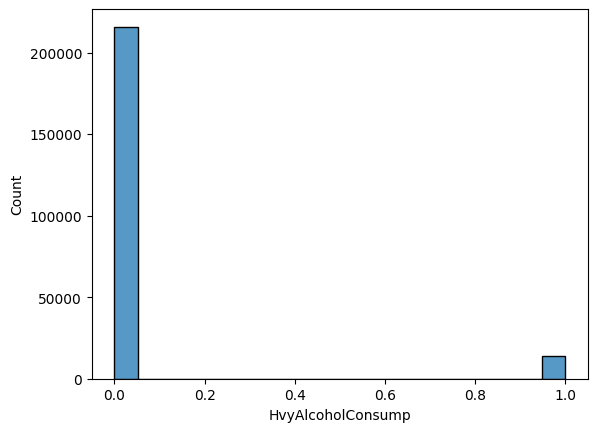

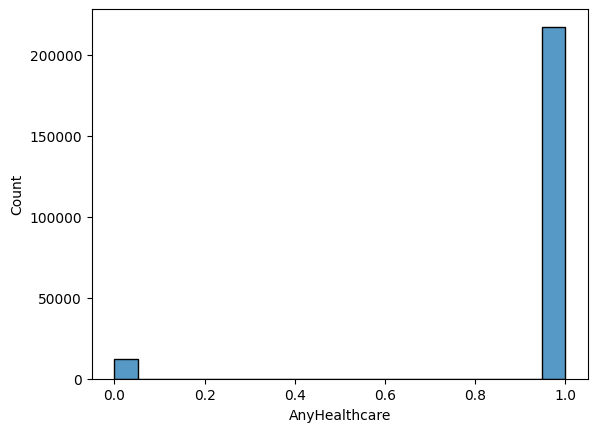

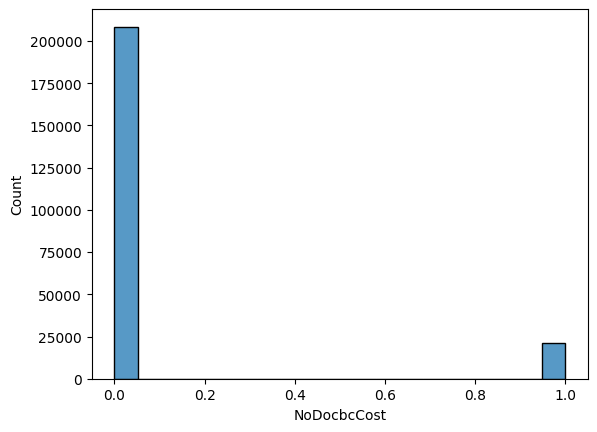

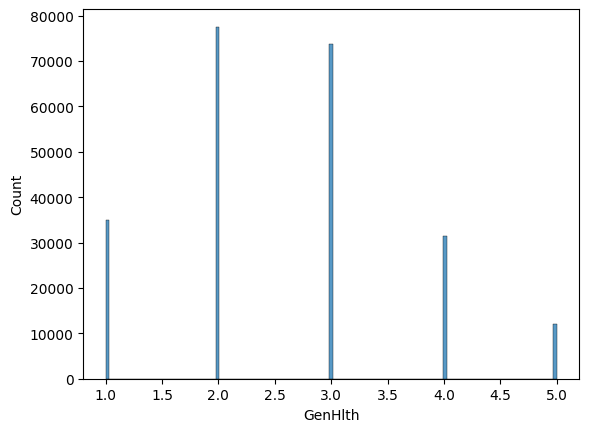

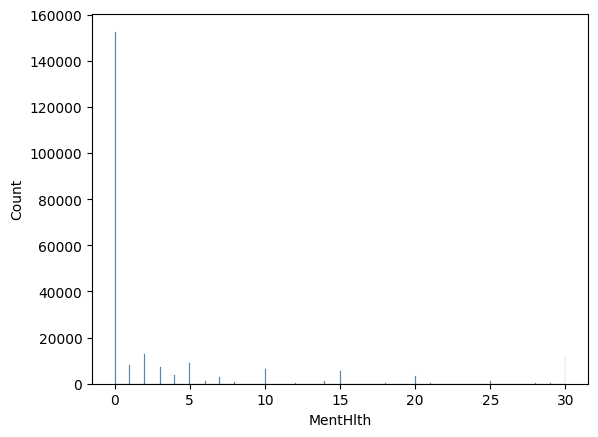

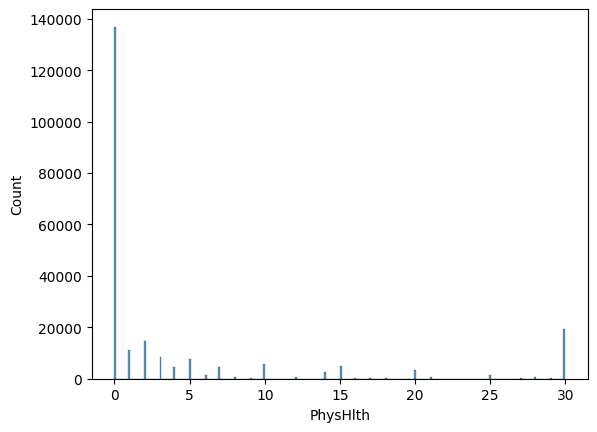

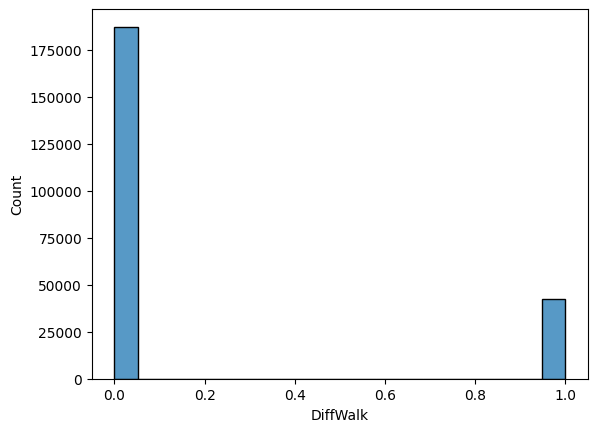

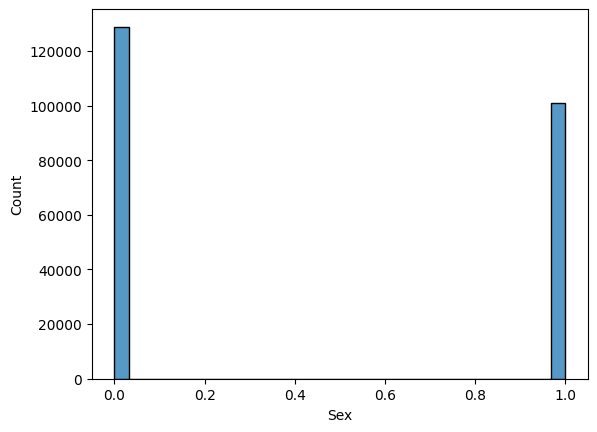

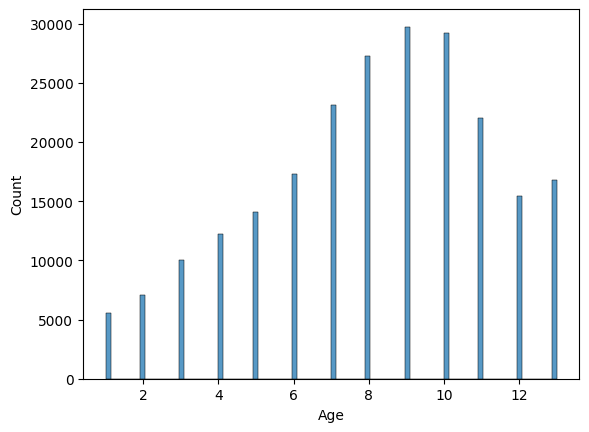

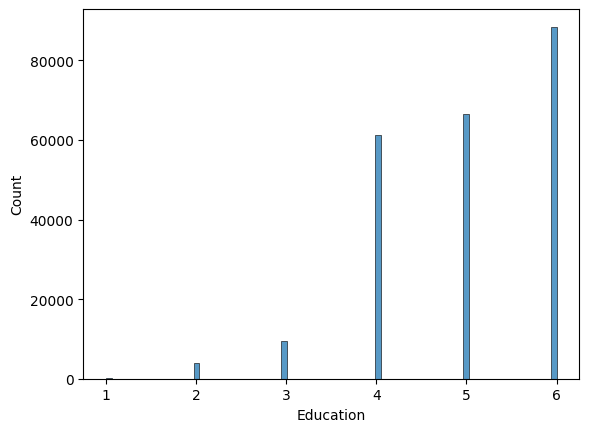

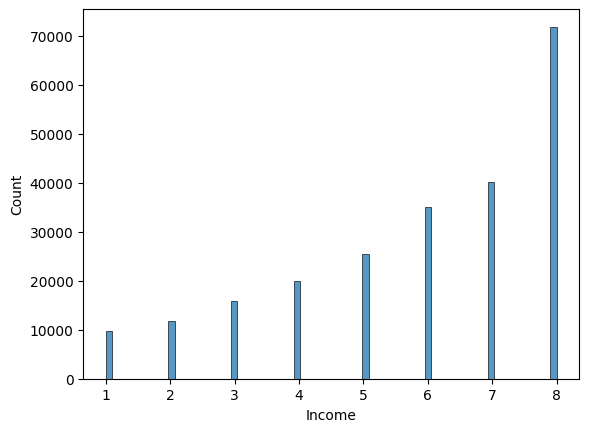

In [24]:
for i in df.select_dtypes(include=np.number):
  sns.histplot(df[i])
  plt.show()

In [25]:
categories = {"Male":1, "Female":0} #Replace categorical values with numbers
df['Sex'] = df['Sex'].replace(categories)

Y = df["Label"].values
X = df.drop(labels = ["Label"], axis=1)

In [26]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets into 80,20 %
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(183824, 21)
(183824,)


In [27]:
from keras.utils import normalize
X = normalize(X, axis=1)

# Technique 1: Appropriate Model Selection

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train, y_train)
LR_prediction = model_LR.predict(X_test)

accuracy = metrics.accuracy_score(y_test, LR_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9002981047500925


In [29]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train)
prediction_test_RF = model_RF.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_RF)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8914202406597471


In [30]:
from sklearn.ensemble import AdaBoostClassifier
model_Adaboost = AdaBoostClassifier()
model_Adaboost.fit(X_train, y_train)
prediction_test_Adaboost = model_Adaboost.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_Adaboost)
print ("  Accuracy:", accuracy)

  Accuracy: 0.899667080096612


In [31]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
prediction_test_DT = model_DT.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_DT)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8341057945470766


In [32]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
prediction_test_NB = model_NB.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_NB)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8152838522967122


In [33]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
prediction_test_KNN = model_KNN.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_KNN)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8863067650194747


In [34]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
prediction_test_XGB = model_XGB.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_XGB)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8994494853885153


In [35]:
from lightgbm import LGBMClassifier
model_LGBM = XGBClassifier()
model_LGBM.fit(X_train, y_train)
prediction_test_LGBM = model_LGBM.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test_LGBM)
print ("  Accuracy:", accuracy)

  Accuracy: 0.8994494853885153


Random Forest

In [36]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train) # Train the model on training data

#importances = list(model_RF.feature_importances_)
features_list = list(X.columns)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

BMI                  0.193357
Age                  0.108796
Income               0.104901
PhysHlth             0.086810
Education            0.073497
GenHlth              0.066729
MentHlth             0.063724
Fruits               0.033636
Stroke               0.028555
Diabetes             0.028528
PhysActivity         0.028391
Veggies              0.027207
HighBP               0.026477
Sex                  0.023589
Smoker               0.023479
HighChol             0.023105
DiffWalk             0.022897
NoDocbcCost          0.014931
HvyAlcoholConsump    0.009463
AnyHealthcare        0.007890
CholCheck            0.004038
dtype: float64


In [37]:
prediction_test_RF = model_RF.predict(X_test) #Test prediction on testing data.
print("METRICS FOR IMBALANCED DATA: ") #ACCURACY METRICS
print ("  Accuracy =", metrics.accuracy_score(y_test, prediction_test_RF))
print()

(unique, counts) = np.unique(prediction_test_RF, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test_RF)
print("Confusion Metrics: \n", cm)

METRICS FOR IMBALANCED DATA: 
  Accuracy = 0.8914202406597471

Count of predicted label: [0. 1.] [44473  1484]

Confusion Metrics: 
 [[40376   893]
 [ 4097   591]]


Precision Values for: 
  Healthy Patients with no disease = 0.9078766892271716
  Patients With Heart disease = 0.39824797843665766

Recall Values for: 
  Healthy Patients with no disease =  0.9783614819840558
  Healthy Patients With Heart disease =  0.1260665529010239

F-Measure Values for: 
  Healthy Patients with no disease =  0.9418021506379604
  Patients with Heart disease =  0.19151004536616978

ROC_AUC score for imbalanced data is:  0.5522140174425398



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


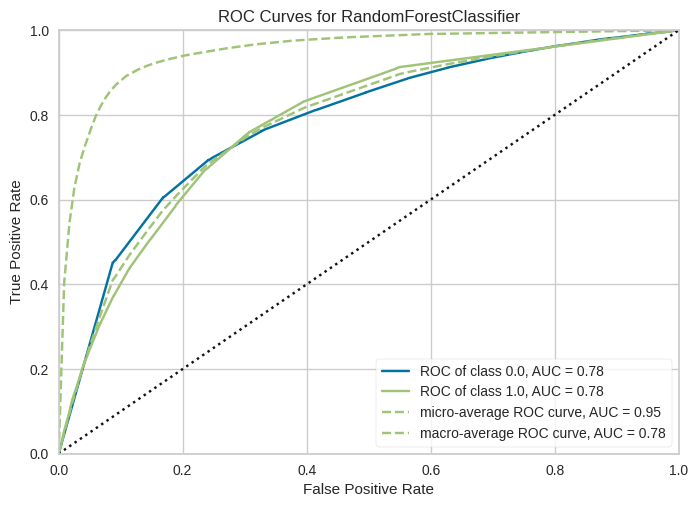

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn
print("ROC_AUC score for imbalanced data is: ", roc_auc_score(y_test, prediction_test_RF))
print()

from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF)  #Create object
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()

<ipython-input-39-6a0e407f93db>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-39-6a0e407f93db>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-39-6a0e407f93db>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-39-6a0e407f93db>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-39-6a

[LightGBM] [Info] Number of positive: 19029, number of negative: 164795
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 183824, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103517 -> initscore=-2.158738
[LightGBM] [Info] Start training from score -2.158738


<ipython-input-39-6a0e407f93db>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-39-6a0e407f93db>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


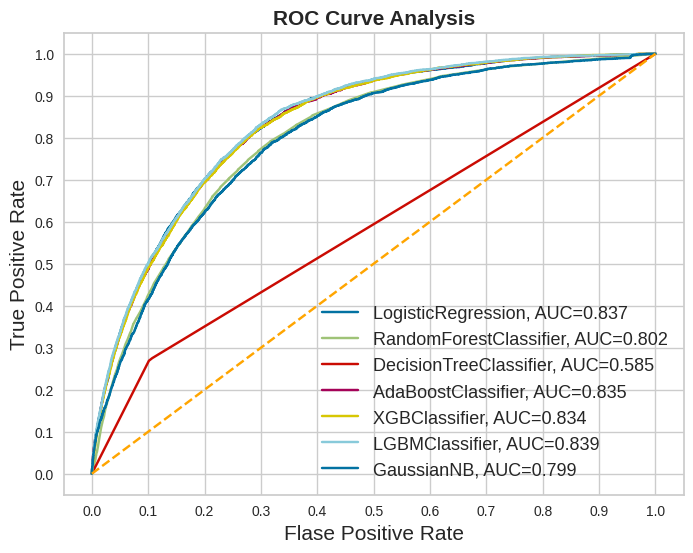

In [39]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         AdaBoostClassifier(),
         XGBClassifier(),
         LGBMClassifier(),
         GaussianNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

# Handling Imbalanced data

Technique 1: Generate synthetic data
SMOTE: Synthetic Minority Oversampling Technique

https://imbalanced-learn.org/stable/over_sampling.html?highlight=smote

SMOTE may not be the best choice all the time. It is one of many things
that you need to explore.

In [40]:
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0. 1.] [206064  23717]
After SMOTE:  [0. 1.] [206064 206064]


LOGISTIC REGRESSION


Accuracy: 0.7558779996603013

Count of predicted label: [0. 1.] [38474 43952]

Confusion Metrics: 
 [[29855 11503]
 [ 8619 32449]]

Precision Values for: 
  Healthy Patients with no disease = 0.7759785829391277
  Patients With Heart disease = 0.7382826720058245

Recall Values for: 
  Healthy Patients with no disease =  0.7218675951448329
  Healthy Patients With Heart disease =  0.7901285672543099

F-Measure Values for: 
  Healthy Patients with no disease =  0.7479456859404751
  Patients with Heart disease =  0.7633262761703128

ROC AUC score for Logestic Regression model after SMOTE:  0.7559980811995713



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


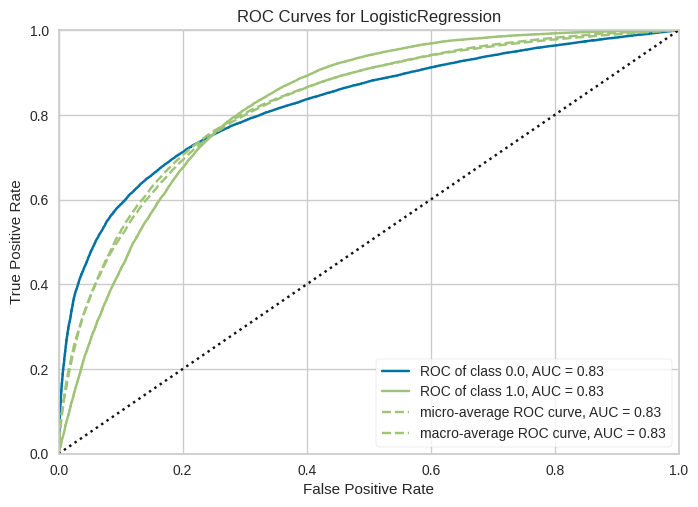

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smote, y_train_smote)
LR_prediction_smote = model_LR.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, LR_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logestic Regression model after SMOTE: ",roc_auc_score(y_test_smote, LR_prediction_smote))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

RANDOM FOREST

Accuracy =  0.9288452672700361

Count of predicted labels:  [0. 1.] [41743 40683]

Confusion Metrics after SMOTE: 
 [[38618  2740]
 [ 3125 37943]]

Precision Values for: 
  Healthy Patients with no disease = 0.925137148743502
  Patients With Heart disease = 0.9326500012290145

Recall Values for: 
  Healthy Patients with no disease =  0.9337492141786353
  Healthy Patients With Heart disease =  0.9239066913411902

F-Measure Values for: 
  Healthy Patients with no disease =  0.9294232319707344
  Patients with Heart disease =  0.928257758314883

ROC AUC score for Random Forest model after SMOTE:  0.9288279527599128



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


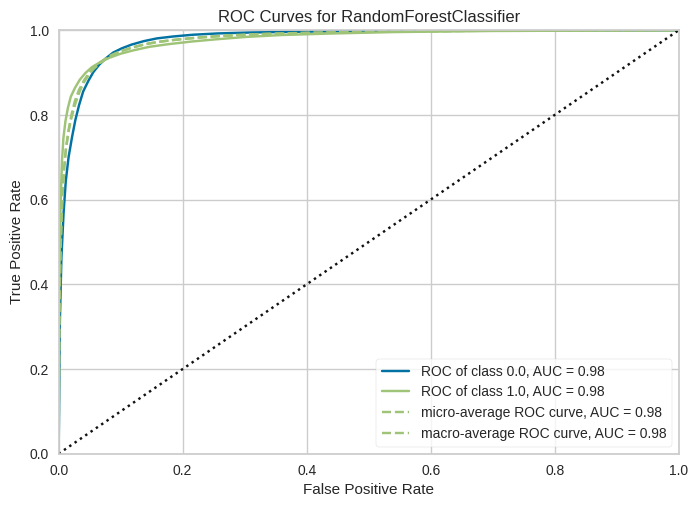

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [42]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))
print()

(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after SMOTE: ",roc_auc_score(y_test_smote, RF_prediction_smote))
print()

roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

Decision Tree


Accuracy =  0.8870138063232476

Count of predicted labels:  [0. 1.] [40635 41791]

Confusion Metrics after SMOTE: 
 [[36340  5018]
 [ 4295 36773]]

Precision Values for: 
  Healthy Patients with no disease = 0.8943029408145687
  Patients With Heart disease = 0.8799262999210357

Recall Values for: 
  Healthy Patients with no disease =  0.8786691812950336
  Healthy Patients With Heart disease =  0.8954173565793319

F-Measure Values for: 
  Healthy Patients with no disease =  0.8864171331699048
  Patients with Heart disease =  0.8876042433531662

ROC AUC score for Decision Tree model after SMOTE:  0.8870432689371828



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


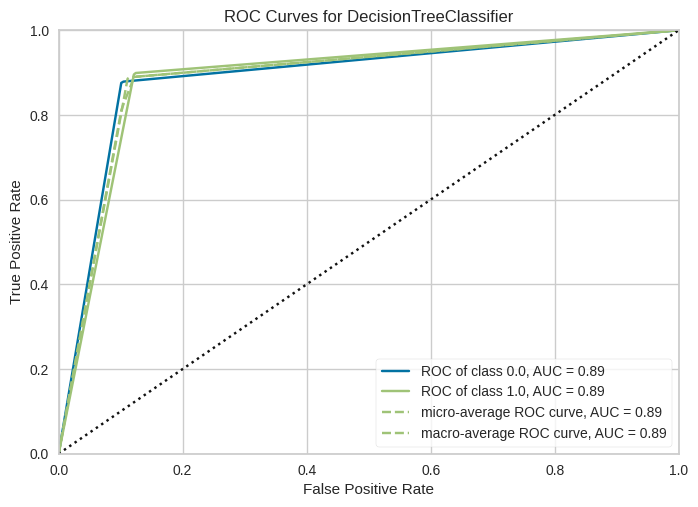

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smote, y_train_smote)

DT_prediction_smote = model_DT.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, DT_prediction_smote))
print()

(unique, counts) = np.unique(DT_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, DT_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after SMOTE: ",roc_auc_score(y_test_smote, DT_prediction_smote))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

ADABOOST

Accuracy =  0.850010918884818

Count of predicted labels:  [0. 1.] [39997 42429]

Confusion Metrics after SMOTE: 
 [[34496  6862]
 [ 5501 35567]]

Precision Values for: 
  Healthy Patients with no disease = 0.8624646848513638
  Patients With Heart disease = 0.8382709938956846

Recall Values for: 
  Healthy Patients with no disease =  0.8340828860196334
  Healthy Patients With Heart disease =  0.866051426901724

F-Measure Values for: 
  Healthy Patients with no disease =  0.8480363837502304
  Patients with Heart disease =  0.8519348000526966

ROC AUC score for AdaBoost model after SMOTE:  0.8500671564606787



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


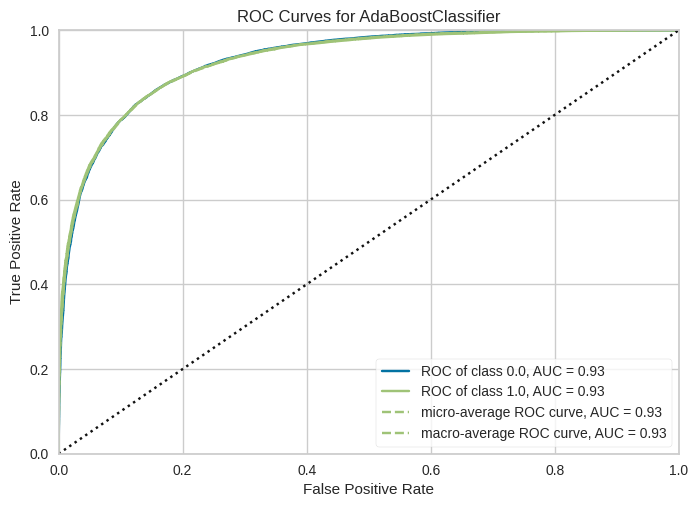

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [44]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smote, y_train_smote)

AdaBoost_prediction_smote = model_AdaBoost.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, AdaBoost_prediction_smote))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, AdaBoost_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for AdaBoost model after SMOTE: ",roc_auc_score(y_test_smote, AdaBoost_prediction_smote))
print()

roc_auc=ROCAUC(model_AdaBoost)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

XGBoost

Accuracy =  0.9109382961686846

Count of predicted labels:  [0 1] [43235 39191]

Confusion Metrics after SMOTE: 
 [[38626  2732]
 [ 4609 36459]]

Precision Values for: 
  Healthy Patients with no disease = 0.8933965537180525
  Patients With Heart disease = 0.9302901176290475

Recall Values for: 
  Healthy Patients with no disease =  0.9339426471299386
  Healthy Patients With Heart disease =  0.8877715009252947

F-Measure Values for: 
  Healthy Patients with no disease =  0.9132197699573251
  Patients with Heart disease =  0.9085336223974881

ROC AUC score for XGBoost model after SMOTE:  0.9108570740276166



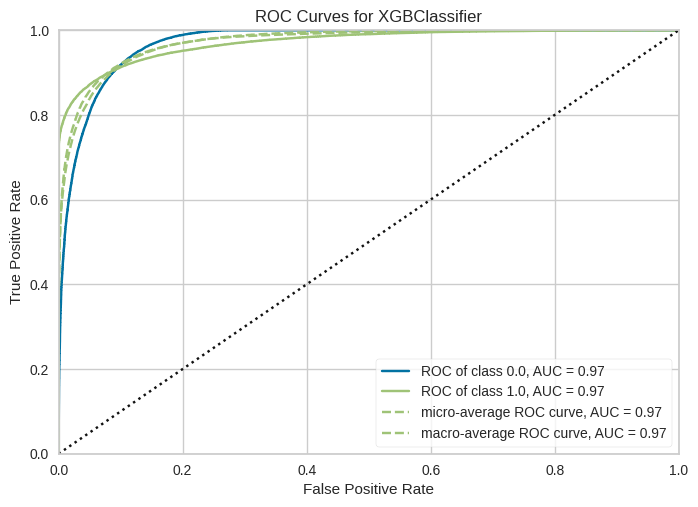

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smote, y_train_smote)

XGB_prediction_smote = model_XGB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, XGB_prediction_smote))
print()

(unique, counts) = np.unique(XGB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, XGB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBoost model after SMOTE: ",roc_auc_score(y_test_smote, XGB_prediction_smote))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

LIGHT GBM

[LightGBM] [Info] Number of positive: 164996, number of negative: 164706
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 329702, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500440 -> initscore=0.001759
[LightGBM] [Info] Start training from score 0.001759
Accuracy =  0.8999223545968505

Count of predicted labels:  [0. 1.] [43083 39343]

Confusion Metrics after SMOTE: 
 [[38096  3262]
 [ 4987 36081]]

Precision Values for: 
  Healthy Patients with no disease = 0.8842466866281364
  Patients With Heart disease = 0.9170881732455582

Recall Values for: 
  Healthy Patients with no disease =  0.921127714106098
  Healthy Patients With Heart disease =  0.878567254309925

F-Measure Values for: 


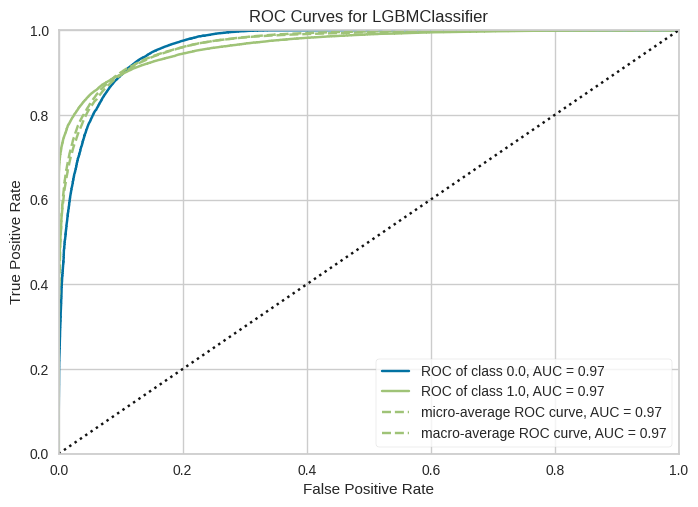

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [46]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smote, y_train_smote)

LGBM_prediction_smote = model_LGBM.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, LGBM_prediction_smote))
print()

(unique, counts) = np.unique(LGBM_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, LGBM_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for LightGBoost model after SMOTE: ",roc_auc_score(y_test_smote, LGBM_prediction_smote))
print()

roc_auc=ROCAUC(model_LGBM)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

Gaussian Naive Bayes

Accuracy =  0.7258753305995681

Count of predicted labels:  [0. 1.] [40727 41699]

Confusion Metrics after SMOTE: 
 [[29745 11613]
 [10982 30086]]

Precision Values for: 
  Healthy Patients with no disease = 0.7303508728853095
  Patients With Heart disease = 0.7215041128084606

Recall Values for: 
  Healthy Patients with no disease =  0.7192078920644132
  Healthy Patients With Heart disease =  0.7325898509788643

F-Measure Values for: 
  Healthy Patients with no disease =  0.7247365535725162
  Patients with Heart disease =  0.7270047241050176

ROC AUC score for Gaussian Naive Bayes model after SMOTE:  0.7258988715216387



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


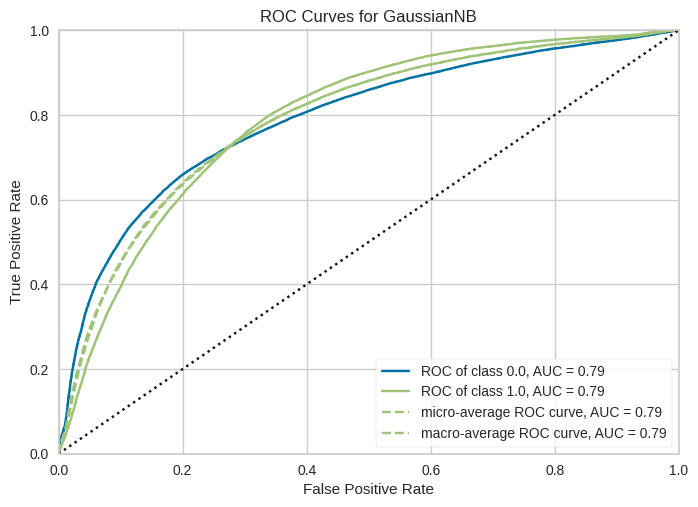

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
model_NB = GaussianNB()
model_NB.fit(X_train_smote, y_train_smote)

NB_prediction_smote = model_NB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, NB_prediction_smote))
print()

(unique, counts) = np.unique(NB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, NB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gaussian Naive Bayes model after SMOTE: ",roc_auc_score(y_test_smote, NB_prediction_smote))
print()

roc_auc=ROCAUC(model_NB)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

<ipython-input-48-ed60fa9a5ea0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-48-ed60fa9a5ea0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-48-ed60fa9a5ea0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-48-ed60fa9a5ea0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-48-ed

[LightGBM] [Info] Number of positive: 164996, number of negative: 164706
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 329702, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500440 -> initscore=0.001759
[LightGBM] [Info] Start training from score 0.001759


<ipython-input-48-ed60fa9a5ea0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-48-ed60fa9a5ea0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


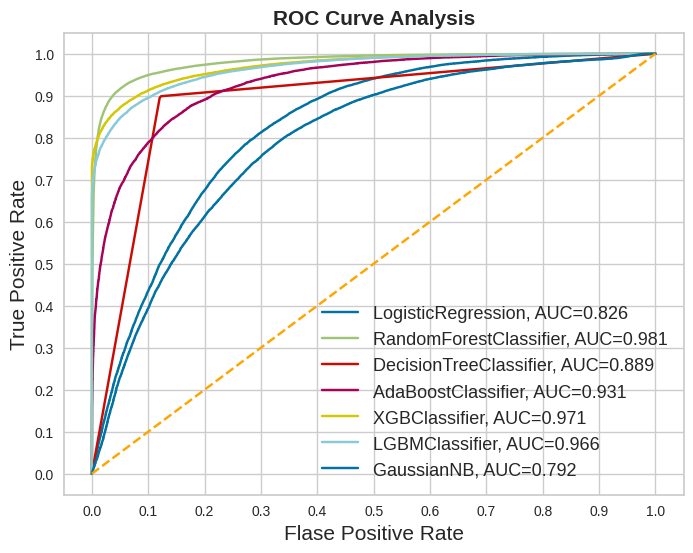

In [48]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         AdaBoostClassifier(),
         XGBClassifier(),
         LGBMClassifier(),
         GaussianNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train_smote, y_train_smote)
    yproba = model.predict_proba(X_test_smote)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test_smote, yproba)
    auc = roc_auc_score(y_test_smote, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#Handling Imbalanced Data using SMOTETomek
It combines SMOTE and Tomek

In [49]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTEENN: ", unique2, counts2)

X_train_smoteTomek, X_test_smoteTomek, y_train_smoteTomek, y_test_smoteTomek = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0. 1.] [206064  23717]
After SMOTEENN:  [0. 1.] [205841 205841]


Logistic Regression

Accuracy of Logistic Regression after SMOTETomek: 0.7566464651371801

Count of predicted label: [0. 1.] [38554 43783]

Confusion Metrics: 
 [[29893 11376]
 [ 8661 32407]]

Precision Values for: 
  Healthy Patients with no disease = 0.7753540488665249
  Patients With Heart disease = 0.7401731265559692

Recall Values for: 
  Healthy Patients with no disease =  0.7243451501126754
  Healthy Patients With Heart disease =  0.7891058731859355

F-Measure Values for: 
  Healthy Patients with no disease =  0.7489821229470203
  Patients with Heart disease =  0.7638566428209449

ROC AUC score for Logistic Regression model after SMOTETomek:  0.7567255116493055



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


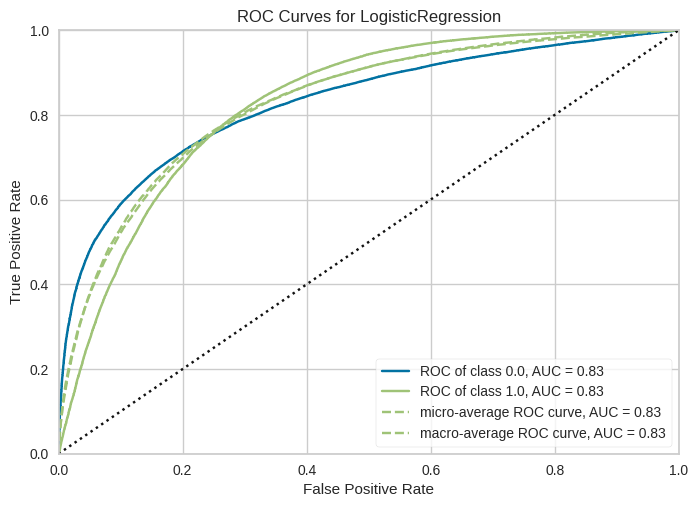

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [50]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteTomek, y_train_smoteTomek)
LR_prediction_smoteTomek = model_LR.predict(X_test_smoteTomek)

accuracy = metrics.accuracy_score(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Accuracy of Logistic Regression after SMOTETomek:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteTomek, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after SMOTETomek: ", roc_auc_score(y_test_smoteTomek, LR_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

RANDOM FOREST

Accuracy of Random Forest after SMOTETomek =  0.9272987842646684

Count of predicted labels:  [0. 1.] [41869 40468]

Confusion Metrics after SMOTETomek: 
 [[38576  2693]
 [ 3293 37775]]

Precision Values for: 
  Healthy Patients with no disease = 0.9213499247653395
  Patients With Heart disease = 0.9334535929623407

Recall Values for: 
  Healthy Patients with no disease =  0.934745208267707
  Healthy Patients With Heart disease =  0.9198159150676926

F-Measure Values for: 
  Healthy Patients with no disease =  0.9279992301955784
  Patients with Heart disease =  0.9265845761381476

ROC AUC score for Random Forest model after SMOTETomek:  0.9272805616676998



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


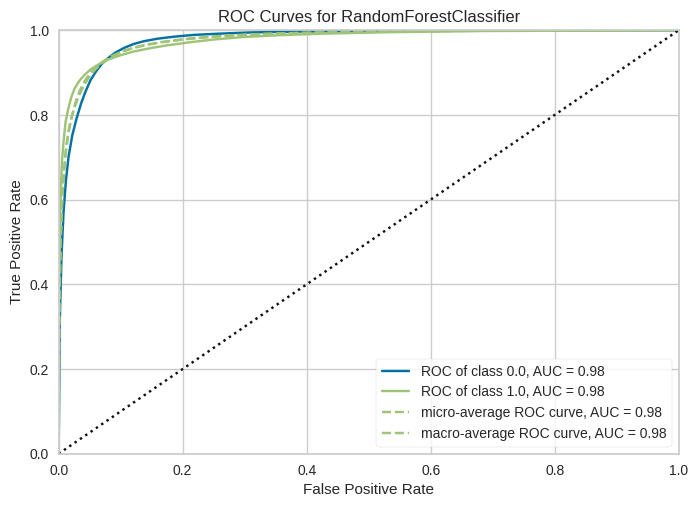

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteTomek, y_train_smoteTomek)

RF_prediction_smoteTomek = model_RF.predict(X_test_smoteTomek)
print ("Accuracy of Random Forest after SMOTETomek = ", metrics.accuracy_score(y_test_smoteTomek, RF_prediction_smoteTomek))
print()

(unique, counts) = np.unique(RF_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, RF_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, RF_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_RF)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

Decision Tree

Accuracy =  0.8836731967402262

Count of predicted labels:  [0. 1.] [40639 41698]

Confusion Metrics after SMOTETomek: 
 [[36165  5104]
 [ 4474 36594]]

Precision Values for: 
  Healthy Patients with no disease = 0.8899087083835724
  Patients With Heart disease = 0.8775960477720754

Recall Values for: 
  Healthy Patients with no disease =  0.8763236327509754
  Healthy Patients With Heart disease =  0.8910587318593552

F-Measure Values for: 
  Healthy Patients with no disease =  0.8830639253796942
  Patients with Heart disease =  0.8842761520431095

ROC AUC score for Decision Tree model after SMOTETomek:  0.8836911823051654



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


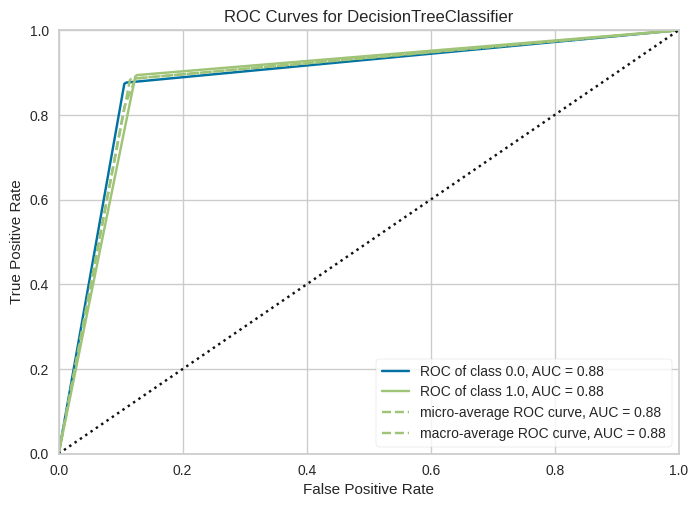

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteTomek, y_train_smoteTomek)

DT_prediction_smoteTomek = model_DT.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, DT_prediction_smoteTomek))
print()

(unique, counts) = np.unique(DT_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, DT_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, DT_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

AdaBoost

Accuracy =  0.8536988231293343

Count of predicted labels:  [0. 1.] [40347 41990]

Confusion Metrics after SMOTETomek: 
 [[34785  6484]
 [ 5562 35506]]

Precision Values for: 
  Healthy Patients with no disease = 0.8621458844523756
  Patients With Heart disease = 0.8455822814955942

Recall Values for: 
  Healthy Patients with no disease =  0.8428844895684412
  Healthy Patients With Heart disease =  0.864566085516704

F-Measure Values for: 
  Healthy Patients with no disease =  0.8524063909037444
  Patients with Heart disease =  0.8549688169712731

ROC AUC score for AdaBoost model after SMOTETomek:  0.8537252875425726



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


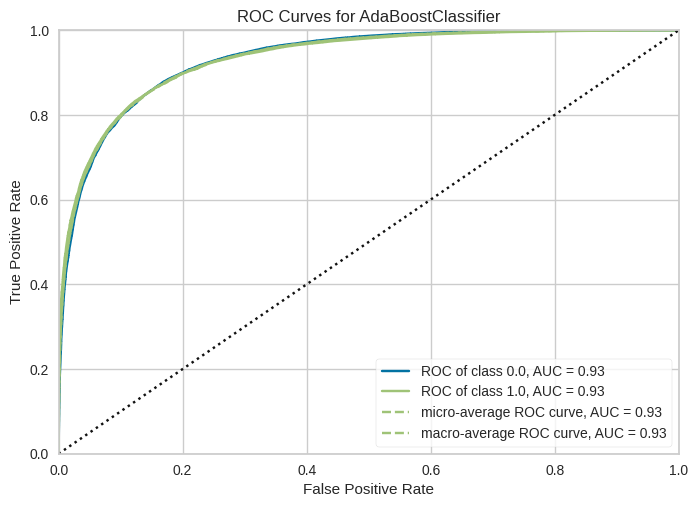

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteTomek, y_train_smoteTomek)

AdaBoost_prediction_smoteTomek = model_AdaBoost.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, AdaBoost_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for AdaBoost model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_AdaBoost)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

XGBOOST

Accuracy =  0.9103076381213792

Count of predicted labels:  [0 1] [43504 38833]

Confusion Metrics after SMOTETomek: 
 [[38694  2575]
 [ 4810 36258]]

Precision Values for: 
  Healthy Patients with no disease = 0.889435454211107
  Patients With Heart disease = 0.9336904179435017

Recall Values for: 
  Healthy Patients with no disease =  0.9376044973224454
  Healthy Patients With Heart disease =  0.88287717931236

F-Measure Values for: 
  Healthy Patients with no disease =  0.9128849987613982
  Patients with Heart disease =  0.907573121738151

ROC AUC score for XGBoost model after SMOTETomek:  0.9102408383174027



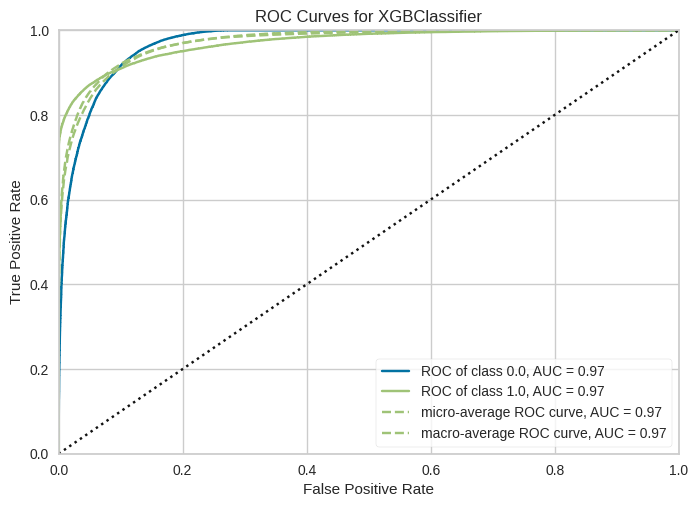

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteTomek, y_train_smoteTomek)

XGB_prediction_smoteTomek = model_XGB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, XGB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(XGB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, XGB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBoost model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, XGB_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

Light GBM

[LightGBM] [Info] Number of positive: 164773, number of negative: 164572
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 329345, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500305 -> initscore=0.001221
[LightGBM] [Info] Start training from score 0.001221
Accuracy =  0.901065134751084

Count of predicted labels:  [0. 1.] [43249 39088]

Confusion Metrics after SMOTETomek: 
 [[38186  3083]
 [ 5063 36005]]

Precision Values for: 
  Healthy Patients with no disease = 0.8829337094499294
  Patients With Heart disease = 0.9211266884977487

Recall Values for: 
  Healthy Patients with no disease =  0.9252950156291647
  Healthy Patients With Heart disease =  0.8767166650433428

F-Measure Values 

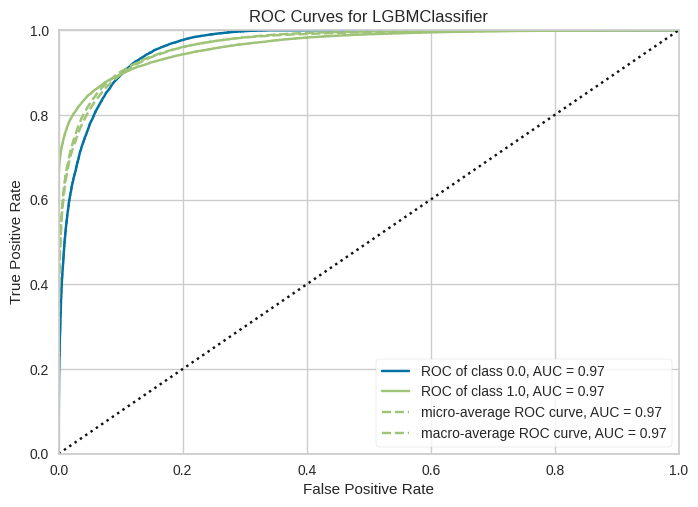

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [55]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteTomek, y_train_smoteTomek)

LGBM_prediction_smoteTomek = model_LGBM.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, LGBM_prediction_smoteTomek))
print()

(unique, counts) = np.unique(LGBM_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, LGBM_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for LGBMoost model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, LGBM_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_LGBM)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

GAUSSIAN MAIVE BAYES

Accuracy =  0.725263247385744

Count of predicted labels:  [0. 1.] [40836 41501]

Confusion Metrics after SMOTETomek: 
 [[29742 11527]
 [11094 29974]]

Precision Values for: 
  Healthy Patients with no disease = 0.7283279459300617
  Patients With Heart disease = 0.7222476566829715

Recall Values for: 
  Healthy Patients with no disease =  0.7206862293731372
  Healthy Patients With Heart disease =  0.7298626667965326

F-Measure Values for: 
  Healthy Patients with no disease =  0.7244869374581329
  Patients with Heart disease =  0.7260351948067676

ROC AUC score for Gaussian Naive Bayes model after SMOTETomek:  0.7252744480848349



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


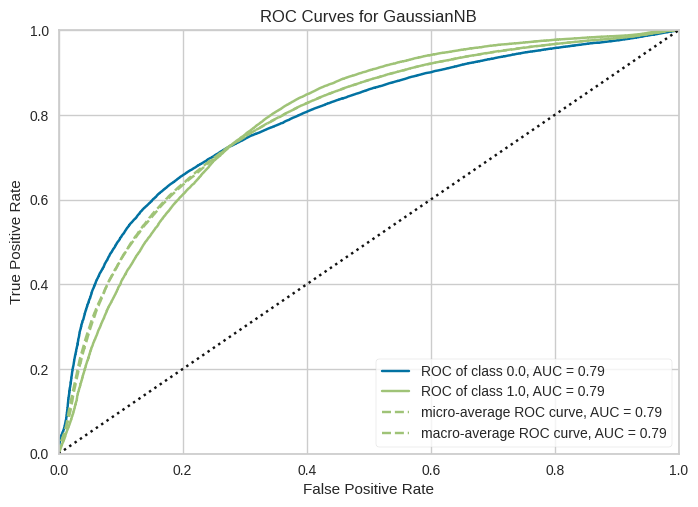

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [56]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteTomek, y_train_smoteTomek)

NB_prediction_smoteTomek = model_NB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, NB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(NB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, NB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gaussian Naive Bayes model after SMOTETomek: ",roc_auc_score(y_test_smoteTomek, NB_prediction_smoteTomek))
print()

roc_auc=ROCAUC(model_NB)
roc_auc.fit(X_train_smoteTomek, y_train_smoteTomek)
roc_auc.score(X_test_smoteTomek, y_test_smoteTomek)
roc_auc.show()

<ipython-input-57-26046124ad30>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-57-26046124ad30>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-57-26046124ad30>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-57-26046124ad30>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-57-26

[LightGBM] [Info] Number of positive: 164773, number of negative: 164572
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 329345, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500305 -> initscore=0.001221
[LightGBM] [Info] Start training from score 0.001221


<ipython-input-57-26046124ad30>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-57-26046124ad30>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


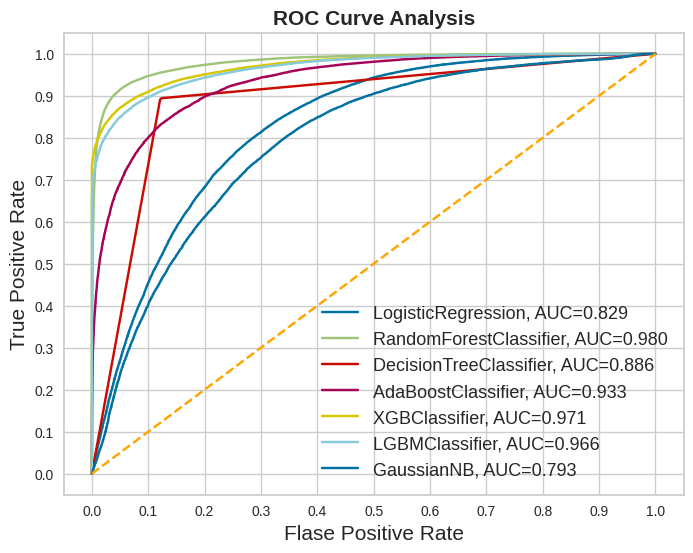

In [57]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         AdaBoostClassifier(),
         XGBClassifier(),
         LGBMClassifier(),
         GaussianNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train_smoteTomek, y_train_smoteTomek)
    yproba = model.predict_proba(X_test_smoteTomek)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test_smoteTomek, yproba)
    auc = roc_auc_score(y_test_smoteTomek, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#Technique 3: ADASYN: Adaptive Synthetic

In [58]:
from imblearn.over_sampling import ADASYN

X_adasyn, Y_adasyn = ADASYN().fit_resample(X, Y)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, Y_adasyn, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique3, counts3) = np.unique(Y_adasyn, return_counts=True)
print("After ADASYN: ", unique3, counts3)

Original data:  [0. 1.] [206064  23717]
After ADASYN:  [0. 1.] [206064 204513]


Logistic Regression

Accuracy: 0.7410127137220517

Count of predicted label: [0. 1.] [38306 43810]

Confusion Metrics: 
 [[29213 12174]
 [ 9093 31636]]

Precision Values for: 
  Healthy Patients with no disease = 0.7626220435440924
  Patients With Heart disease = 0.7221182378452408

Recall Values for: 
  Healthy Patients with no disease =  0.7058496629376374
  Healthy Patients With Heart disease =  0.7767438434530678

F-Measure Values for: 
  Healthy Patients with no disease =  0.733138418681691
  Patients with Heart disease =  0.7484356332580229

ROC AUC score for Logistic Regression model after ADASYN:  0.7412967531953526



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


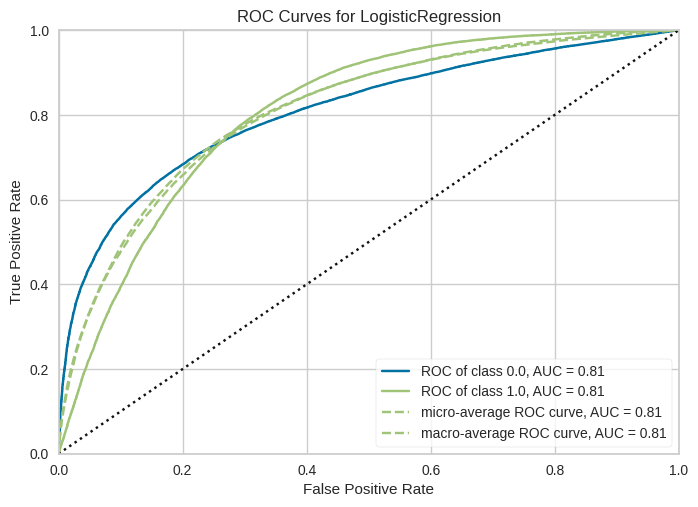

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [59]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_adasyn, y_train_adasyn)
LR_prediction_adasyn = model_LR.predict(X_test_adasyn)

accuracy = metrics.accuracy_score(y_test_adasyn, LR_prediction_adasyn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_adasyn, LR_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Logistic Regression model after ADASYN: ", roc_auc_score(y_test_adasyn, LR_prediction_adasyn))
print()

roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

Random Forest

Accuracy =  0.9270422329387695

Count of predicted label: [0. 1.] [41816 40300]

Confusion Metrics: 
 [[38606  2781]
 [ 3210 37519]]

Precision Values for: 
  Healthy Patients with no disease = 0.9232351253108858
  Patients With Heart disease = 0.9309925558312655

Recall Values for: 
  Healthy Patients with no disease =  0.9328049870732356
  Healthy Patients With Heart disease =  0.9211863782562794

F-Measure Values for: 
  Healthy Patients with no disease =  0.9279953847817989
  Patients with Heart disease =  0.92606350812672

ROC AUC score for Random Forest model after ADASYN:  0.9269956826647574



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


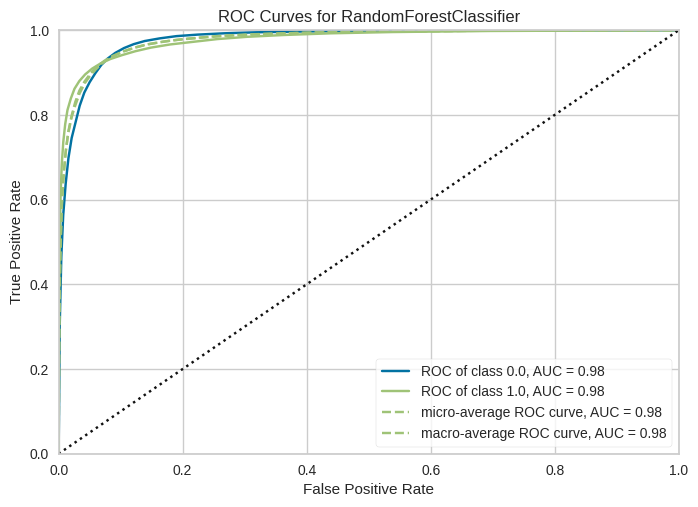

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [60]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_adasyn, y_train_adasyn)

RF_prediction_adasyn = model_RF.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, RF_prediction_adasyn))
print()
(unique, counts) = np.unique(RF_prediction_adasyn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, RF_prediction_adasyn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Random Forest model after ADASYN: ", roc_auc_score(y_test_adasyn, RF_prediction_adasyn))
print()

roc_auc=ROCAUC(model_RF)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

DECISION TREE

Accuracy =  0.8846875152223683

Count of predicted labels:  [0. 1.] [40590 41526]

Confusion Metrics after ADASYN: 
 [[36254  5133]
 [ 4336 36393]]

Precision Values for: 
  Healthy Patients with no disease = 0.8931756590293176
  Patients With Heart disease = 0.8763906949862736

Recall Values for: 
  Healthy Patients with no disease =  0.8759755478773528
  Healthy Patients With Heart disease =  0.8935402293206315

F-Measure Values for: 
  Healthy Patients with no disease =  0.8844919916561963
  Patients with Heart disease =  0.8848823779709439

ROC AUC score for Decision Tree model after ADASYN:  0.8847578885989921



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


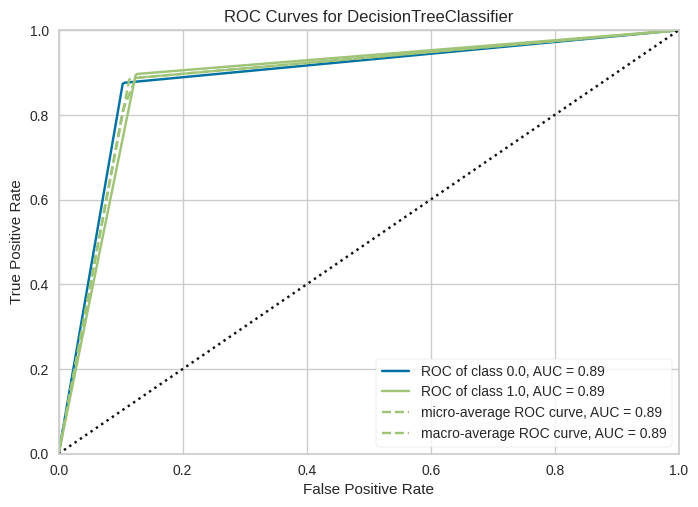

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [61]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_adasyn, y_train_adasyn)

DT_prediction_adasyn = model_DT.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, DT_prediction_adasyn))
print()

(unique, counts) = np.unique(DT_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, DT_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Decision Tree model after ADASYN: ",roc_auc_score(y_test_adasyn, DT_prediction_adasyn))
print()

roc_auc=ROCAUC(model_DT)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

ADABOOST

Accuracy =  0.8465341711724877

Count of predicted labels:  [0. 1.] [40513 41603]

Confusion Metrics after ADABOOST: 
 [[34649  6738]
 [ 5864 34865]]

Precision Values for: 
  Healthy Patients with no disease = 0.8552563374719226
  Patients With Heart disease = 0.8380405259236112

Recall Values for: 
  Healthy Patients with no disease =  0.8371952545485297
  Healthy Patients With Heart disease =  0.8560239632694149

F-Measure Values for: 
  Healthy Patients with no disease =  0.8461294261294261
  Patients with Heart disease =  0.8469367924986639

ROC AUC score for AdaBoost model after ADASYN:  0.8466096089089723



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


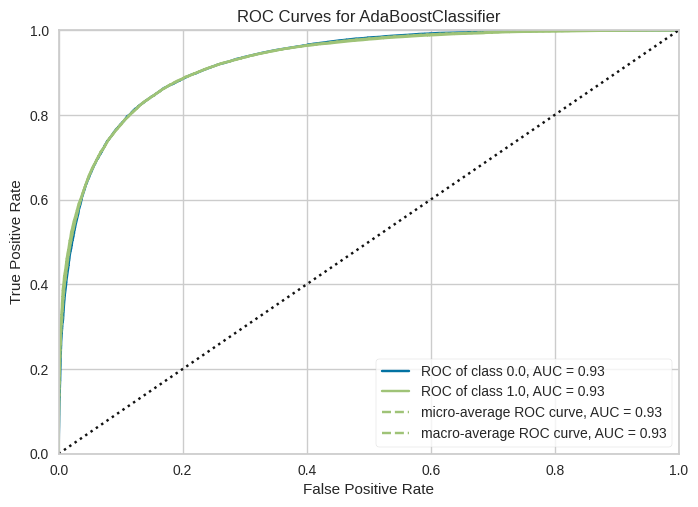

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_adasyn, y_train_adasyn)

AdaBoost_prediction_adasyn = model_AdaBoost.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, AdaBoost_prediction_adasyn))
print()

(unique, counts) = np.unique(AdaBoost_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, AdaBoost_prediction_adasyn)
print("Confusion Metrics after ADABOOST: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for AdaBoost model after ADASYN: ",roc_auc_score(y_test_adasyn, AdaBoost_prediction_adasyn))
print()

roc_auc=ROCAUC(model_AdaBoost)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

XGBOOST

Accuracy =  0.9092259730137854

Count of predicted labels:  [0 1] [43743 38373]

Confusion Metrics after ADASYN: 
 [[38838  2549]
 [ 4905 35824]]

Precision Values for: 
  Healthy Patients with no disease = 0.887867773129415
  Patients With Heart disease = 0.9335730852422276

Recall Values for: 
  Healthy Patients with no disease =  0.9384106120279315
  Healthy Patients With Heart disease =  0.8795698396719782

F-Measure Values for: 
  Healthy Patients with no disease =  0.9124397979560672
  Patients with Heart disease =  0.9057672372379966

ROC AUC score for XGBOOST model after ADASYN:  0.9089902258499549



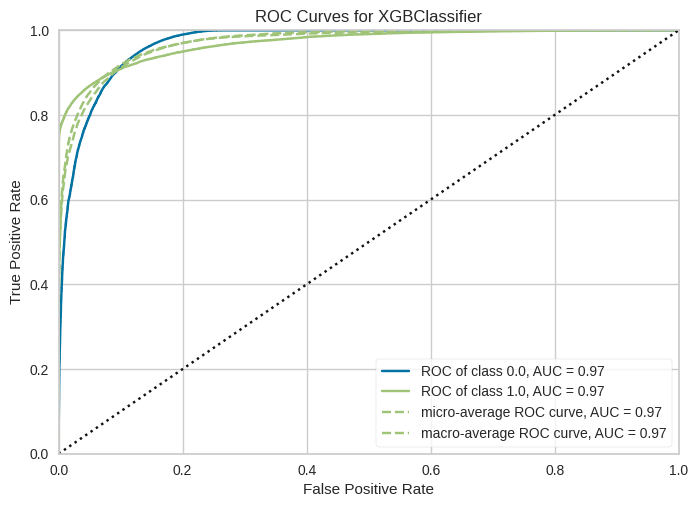

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [63]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_adasyn, y_train_adasyn)

XGB_prediction_adasyn = model_XGB.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, XGB_prediction_adasyn))
print()

(unique, counts) = np.unique(XGB_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, XGB_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for XGBOOST model after ADASYN: ",roc_auc_score(y_test_adasyn, XGB_prediction_adasyn))
print()

roc_auc=ROCAUC(model_XGB)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

Light GBM

[LightGBM] [Info] Number of positive: 163784, number of negative: 164677
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 328461, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498641 -> initscore=-0.005437
[LightGBM] [Info] Start training from score -0.005437
Accuracy =  0.8964270056992547

Count of predicted labels:  [0. 1.] [43266 38850]

Confusion Metrics after ADASYN: 
 [[38074  3313]
 [ 5192 35537]]

Precision Values for: 
  Healthy Patients with no disease = 0.8799981509730505
  Patients With Heart disease = 0.9147232947232947

Recall Values for: 
  Healthy Patients with no disease =  0.9199507091598811
  Healthy Patients With Heart disease =  0.872523263522306

F-Measure Values fo

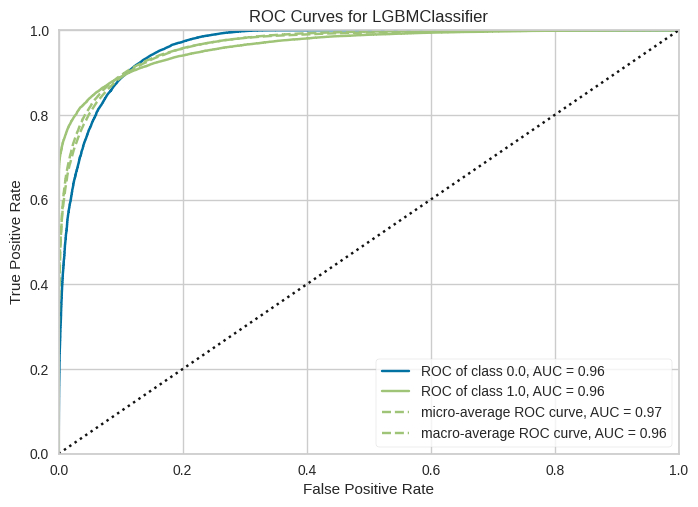

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_adasyn, y_train_adasyn)

LGBM_prediction_adasyn = model_LGBM.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, LGBM_prediction_adasyn))
print()

(unique, counts) = np.unique(LGBM_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, LGBM_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for LGBMOOST model after ADASYN: ",roc_auc_score(y_test_adasyn, LGBM_prediction_adasyn))
print()

roc_auc=ROCAUC(model_LGBM)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

GAUSSIAN NAIVE BAYES

Accuracy =  0.7149033075161966

Count of predicted labels:  [0. 1.] [40500 41616]

Confusion Metrics after ADASYN: 
 [[29238 12149]
 [11262 29467]]

Precision Values for: 
  Healthy Patients with no disease = 0.721925925925926
  Patients With Heart disease = 0.7080690119184929

Recall Values for: 
  Healthy Patients with no disease =  0.7064537173508589
  Healthy Patients With Heart disease =  0.7234894055832454

F-Measure Values for: 
  Healthy Patients with no disease =  0.7141060241552384
  Patients with Heart disease =  0.7156961564150829

ROC AUC score for Gaussian Naive Bayes model after ADASYN:  0.7149715614670521



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


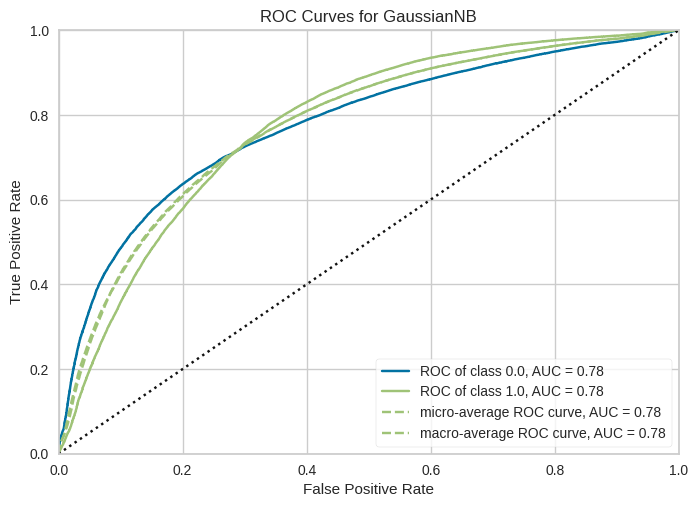

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [65]:
model_NB = GaussianNB()
model_NB.fit(X_train_adasyn, y_train_adasyn)

NB_prediction_adasyn = model_NB.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, NB_prediction_adasyn))
print()

(unique, counts) = np.unique(NB_prediction_adasyn, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_adasyn, NB_prediction_adasyn)
print("Confusion Metrics after ADASYN: \n",cm)
print()

#Print individual precision values for each class, based on the confusion matrix
print("Precision Values for: ")
P0 = cm[0,0] / (cm[0,0]+cm[1,0])
P1 = cm[1,1] / (cm[0,1]+cm[1,1])

print("  Healthy Patients with no disease =", P0)
print("  Patients With Heart disease =",   P1)
print()

#Print individual recall values for each class, based on the confusion matrix
print("Recall Values for: ")
R0 = cm[0,0] / (cm[0,0]+cm[0,1])
R1 = cm[1,1] / (cm[1,1]+cm[1,0])

print("  Healthy Patients with no disease = ", R0 )
print("  Healthy Patients With Heart disease = ", R1 )
print()

#Print individual F-measure values for each class, based on the confusion matrix
print("F-Measure Values for: ")
print("  Healthy Patients with no disease = ", (2 * P0 * R0)/ (P0 + R0))
print("  Patients with Heart disease = ", (2 * P1 * R1)/ (P1 + R1))
print()

#ROC-AUC score
print("ROC AUC score for Gaussian Naive Bayes model after ADASYN: ",roc_auc_score(y_test_adasyn, NB_prediction_adasyn))
print()

roc_auc=ROCAUC(model_NB)
roc_auc.fit(X_train_adasyn, y_train_adasyn)
roc_auc.score(X_test_adasyn, y_test_adasyn)
roc_auc.show()

<ipython-input-66-cb3ab9553474>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-66-cb3ab9553474>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-66-cb3ab9553474>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-66-cb3ab9553474>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-66-cb

[LightGBM] [Info] Number of positive: 163784, number of negative: 164677
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 328461, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498641 -> initscore=-0.005437
[LightGBM] [Info] Start training from score -0.005437


<ipython-input-66-cb3ab9553474>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-66-cb3ab9553474>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


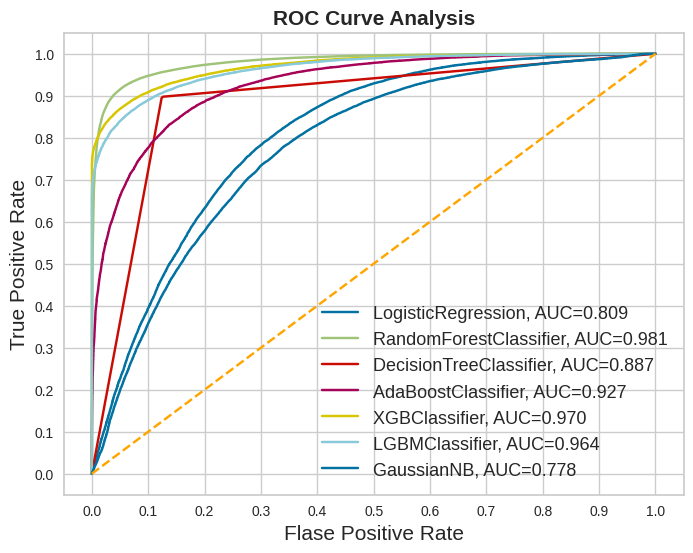

In [66]:
classifiers = [LogisticRegression(max_iter=900),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         AdaBoostClassifier(),
         XGBClassifier(),
         LGBMClassifier(),
         GaussianNB()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train_adasyn, y_train_adasyn)
    yproba = model.predict_proba(X_test_adasyn)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test_adasyn, yproba)
    auc = roc_auc_score(y_test_adasyn, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()